# **Bullet Train Travel Experience**

----------------------------------------
## **Context and Objective**
----------------------------------------

- In a passenger train survey, each passenger was asked whether they were satisfied with their overall travel experience or not, and that is captured in the data of the survey report under the variable labeled ‘Overall_Experience’.
- The objective of this problem is to understand which parameters play an important role in swaying passenger feedback towards a positive scale.

--------------------
## **Datasets**
--------------------

We have two separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they traveled. The survey data is aggregated data of surveys indicating the post-service experience. Treat both these datasets as raw data and perform any necessary data cleaning/validation steps as required.

**Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)**

## **Importing the libraries and overview of the dataset**

In [51]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Metrics to evaluate the model
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, f1_score, 
precision_recall_curve, precision_score, recall_score)

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the datasets**

In [52]:
survey_train = pd.read_csv("Surveydata_train_.csv")
travel_train = pd.read_csv("Traveldata_train_.csv")

survey_test = pd.read_csv("Surveydata_test_.csv")
travel_test = pd.read_csv("Traveldata_test_.csv")

In [53]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [54]:
survey_test.tail()

,ID,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


In [55]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [56]:
travel_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0


In [57]:
survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

* There are missing values in Seat_Comfort, Arrival_Time_Convenient, Catering, Platform_location, ... to treat in the survey training dataset

In [58]:
survey_train.nunique()

ID                         94379
Overall_Experience             2
Seat_Comfort                   6
Seat_Class                     2
Arrival_Time_Convenient        6
Catering                       6
Platform_Location              6
Onboard_Wifi_Service           6
Onboard_Entertainment          6
Online_Support                 6
Ease_of_Online_Booking         6
Onboard_Service                6
Legroom                        6
Baggage_Handling               5
CheckIn_Service                6
Cleanliness                    6
Online_Boarding                6
dtype: int64

In [59]:
survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_Location        35590 non-null  object
 6   Onboard_Wifi_Service     35590 non-null  object
 7   Onboard_Entertainment    35594 non-null  object
 8   Online_Support           35576 non-null  object
 9   Ease_of_Online_Booking   35584 non-null  object
 10  Onboard_Service          32730 non-null  object
 11  Legroom                  35577 non-null  object
 12  Baggage_Handling         35562 non-null  object
 13  CheckIn_Service          35580 non-null  object
 14  Cleanliness              35600 non-nul

* There are missing values in Seat_Comfort, Arrival_Time_Convenient, Catering, Platform_location, ... to treat in the survey test dataset

In [60]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


* There are missing values in Gender, Customer_Type, Age, Type_Travel, ... to treat in the travel training dataset

In [61]:
travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.4+ MB


* There are missing values in Gender, Customer_Type, Age, Type_Travel, ... to treat in the travel test dataset

## Exploratory Data Analysis

### *Understanding the data*
- Duplicates check
- Replace bad data in categorical columns with NaN
- Treat missing/Null values

### **Checking for Duplicates:**
- There are no duplicates present in any of the datasets

In [62]:
survey_train_dupes = survey_train.duplicated(keep='first').sum()
travel_train_dupes = travel_train.duplicated(keep='first').sum()
survey_test_dupes = survey_test.duplicated(keep='first').sum()
travel_test_dupes = travel_test.duplicated(keep='first').sum()

print(survey_train_dupes, travel_train_dupes, survey_test_dupes, travel_test_dupes)

0 0 0 0


## Making Copies of Original Datasets Prior to Data Cleaning

In [63]:
# Save original datasets: Save each to (treated dataframe)
t_survey_train = survey_train
t_travel_train = travel_train

t_survey_test = survey_test
t_travel_test = travel_test

### **Replace bad data in travel_train & travel_test numerical columns with NaN**

In [64]:
def get_bad_character_frequency(df):
    # Create an empty dictionary to store the frequency table
    frequency_table = {}

    # Iterate over each numerical column
    for column in df.select_dtypes(include='number'):
        # Convert the column to string type
        df[column] = df[column].astype(str)

        # Count the non-numeric characters
        counts = df[column].apply(lambda x: len(re.findall(r'[^0-9.]', x)))

        # Calculate the frequency of each count
        frequency = counts.value_counts().to_dict()

        # Store the frequency table in the dictionary
        frequency_table[column] = frequency
    
    return frequency_table

In [65]:
# Print the bad data in travel_train
result = get_bad_character_frequency(t_travel_train)
print(result)

{'ID': {0: 94379}, 'Age': {0: 94346, 3: 33}, 'Travel_Distance': {0: 94379}, 'Departure_Delay_in_Mins': {0: 94322, 3: 57}, 'Arrival_Delay_in_Mins': {0: 94022, 3: 357}}


In [66]:
# Fix Columns in travel_test dataset with bad data
columns_to_clean = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Iterate over the specified columns
for column in columns_to_clean:
    # Replace the occurrences of 'NaNNaNNaN' with a single 'NaN'
    t_travel_test[column] = t_travel_test[column].replace('NaNNaNNaN', np.nan)

    # Convert the column to float type
    t_travel_test[column] = t_travel_test[column].astype(float)

In [67]:
# Fix Columns in travel_train dataset with bad data
columns_to_clean = ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']

# Iterate over the specified columns
for column in columns_to_clean:
    # Replace the occurrences of 'NaNNaNNaN' with a single 'NaN'
    t_travel_train[column] = t_travel_train[column].replace('NaNNaNNaN', np.nan)

    # Convert the column to float type
    t_travel_train[column] = t_travel_train[column].astype(float)

### **Missing Data:**

In [68]:
s_train_null = t_survey_train.isnull().sum()
s_train_null

ID                            0
Overall_Experience            0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [69]:
s_test_null = t_survey_test.isnull().sum()
s_test_null

ID                            0
Seat_Comfort                 22
Seat_Class                    0
Arrival_Time_Convenient    3325
Catering                   3357
Platform_Location            12
Onboard_Wifi_Service         12
Onboard_Entertainment         8
Online_Support               26
Ease_of_Online_Booking       18
Onboard_Service            2872
Legroom                      25
Baggage_Handling             40
CheckIn_Service              22
Cleanliness                   2
Online_Boarding               2
dtype: int64

In [70]:
t_train_null = t_travel_train.isnull().sum()
t_train_null

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [71]:
t_test_null = t_travel_test.isnull().sum()
t_test_null

ID                            0
Gender                       30
Customer_Type              3383
Age                          11
Type_Travel                3448
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      29
Arrival_Delay_in_Mins       123
dtype: int64

## Data Cleaning:
- Missing data in all four Survey and Travel train and test data sets --> Apply consistent preprocessing steps to datasets
- Impute values in the numerical and categorical columns

In [72]:
# Imputing the most frequent value for missing categorical values in the survey train dataset
t_survey_train['Seat_Comfort'].fillna(survey_train['Seat_Comfort'].mode()[0], inplace=True)
t_survey_train['Arrival_Time_Convenient'].fillna(survey_train['Arrival_Time_Convenient'].mode()[0], inplace=True)
t_survey_train['Catering'].fillna(survey_train['Catering'].mode()[0], inplace=True)
t_survey_train['Platform_Location'].fillna(survey_train['Platform_Location'].mode()[0], inplace=True)
t_survey_train['Onboard_Wifi_Service'].fillna(survey_train['Onboard_Wifi_Service'].mode()[0], inplace=True)
t_survey_train['Onboard_Entertainment'].fillna(survey_train['Onboard_Entertainment'].mode()[0], inplace=True)
t_survey_train['Online_Support'].fillna(survey_train['Online_Support'].mode()[0], inplace=True)
t_survey_train['Ease_of_Online_Booking'].fillna(survey_train['Ease_of_Online_Booking'].mode()[0], inplace=True)
t_survey_train['Onboard_Service'].fillna(survey_train['Onboard_Service'].mode()[0], inplace=True)
t_survey_train['Legroom'].fillna(survey_train['Legroom'].mode()[0], inplace=True)
t_survey_train['Baggage_Handling'].fillna(survey_train['Baggage_Handling'].mode()[0], inplace=True)
t_survey_train['CheckIn_Service'].fillna(survey_train['CheckIn_Service'].mode()[0], inplace=True)
t_survey_train['Cleanliness'].fillna(survey_train['Cleanliness'].mode()[0], inplace=True)
t_survey_train['Online_Boarding'].fillna(survey_train['Online_Boarding'].mode()[0], inplace=True)

# t_survey_train_null = t_survey_train.isnull().sum()
# t_survey_train_null

In [73]:
# Imputing the most frequent value for missing categorical values in the survey test dataset
t_survey_test['Seat_Comfort'].fillna(survey_train['Seat_Comfort'].mode()[0], inplace=True)
t_survey_test['Arrival_Time_Convenient'].fillna(survey_train['Arrival_Time_Convenient'].mode()[0], inplace=True)
t_survey_test['Catering'].fillna(survey_train['Catering'].mode()[0], inplace=True)
t_survey_test['Platform_Location'].fillna(survey_train['Platform_Location'].mode()[0], inplace=True)
t_survey_test['Onboard_Wifi_Service'].fillna(survey_train['Onboard_Wifi_Service'].mode()[0], inplace=True)
t_survey_test['Onboard_Entertainment'].fillna(survey_train['Onboard_Entertainment'].mode()[0], inplace=True)
t_survey_test['Online_Support'].fillna(survey_train['Online_Support'].mode()[0], inplace=True)
t_survey_test['Ease_of_Online_Booking'].fillna(survey_train['Ease_of_Online_Booking'].mode()[0], inplace=True)
t_survey_test['Onboard_Service'].fillna(survey_train['Onboard_Service'].mode()[0], inplace=True)
t_survey_test['Legroom'].fillna(survey_train['Legroom'].mode()[0], inplace=True)
t_survey_test['Baggage_Handling'].fillna(survey_train['Baggage_Handling'].mode()[0], inplace=True)
t_survey_test['CheckIn_Service'].fillna(survey_train['CheckIn_Service'].mode()[0], inplace=True)
t_survey_test['Cleanliness'].fillna(survey_train['Cleanliness'].mode()[0], inplace=True)
t_survey_test['Online_Boarding'].fillna(survey_train['Online_Boarding'].mode()[0], inplace=True)

# t_survey_test_null = t_survey_test.isnull().sum()
# t_survey_test_null

In [74]:
# Imputing the most frequent value for missing numerical and categorical values in the travel train dataset
t_travel_train['Gender'].fillna(t_travel_train['Gender'].mode()[0], inplace=True)
t_travel_train['Customer_Type'].fillna(t_travel_train['Customer_Type'].mode()[0], inplace=True)
t_travel_train['Type_Travel'].fillna(t_travel_train['Type_Travel'].mode()[0], inplace=True)

# Calculate the mean values for null numerical values
mean_age = t_travel_train['Age'].mean()
mean_departure = t_travel_train['Departure_Delay_in_Mins'].mean()
mean_arrival = t_travel_train['Arrival_Delay_in_Mins'].mean()

# Impute missing values with the mean age
t_travel_train['Age'].fillna(mean_age, inplace=True)
t_travel_train['Departure_Delay_in_Mins'].fillna(mean_departure, inplace=True)
t_travel_train['Arrival_Delay_in_Mins'].fillna(mean_arrival, inplace=True)

# t_travel_train_null = t_travel_train.isnull().sum()
# t_travel_train_null

In [75]:
# Imputing the most frequent value for missing numerical and categorical values in the travel test dataset
t_travel_test['Gender'].fillna(t_travel_test['Gender'].mode()[0], inplace=True)
t_travel_test['Customer_Type'].fillna(t_travel_test['Customer_Type'].mode()[0], inplace=True)
t_travel_test['Type_Travel'].fillna(t_travel_test['Type_Travel'].mode()[0], inplace=True)

# Calculate the mean values for null numerical values
mean_age = t_travel_test['Age'].mean()
mean_departure = t_travel_test['Departure_Delay_in_Mins'].mean()
mean_arrival = t_travel_test['Arrival_Delay_in_Mins'].mean()

# Impute missing values with the mean age
t_travel_test['Age'].fillna(mean_age, inplace=True)
t_travel_test['Departure_Delay_in_Mins'].fillna(mean_departure, inplace=True)
t_travel_test['Arrival_Delay_in_Mins'].fillna(mean_arrival, inplace=True)

# t_travel_test_null = t_travel_test.isnull().sum()
# t_travel_test_null

## Merge survey and travel datasets on ID for both train and test

In [76]:
t_survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94379 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  94379 non-null  object
 5   Catering                 94379 non-null  object
 6   Platform_Location        94379 non-null  object
 7   Onboard_Wifi_Service     94379 non-null  object
 8   Onboard_Entertainment    94379 non-null  object
 9   Online_Support           94379 non-null  object
 10  Ease_of_Online_Booking   94379 non-null  object
 11  Onboard_Service          94379 non-null  object
 12  Legroom                  94379 non-null  object
 13  Baggage_Handling         94379 non-null  object
 14  CheckIn_Service          94379 non-nul

In [77]:
t_travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  object 
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  float64
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
dtypes: float64(4), object(5)
memory usage: 6.5+ MB


In [78]:
# Merge train datasets
t_travel_train['ID'] = t_travel_train['ID'].astype(np.int64)
df_train = pd.merge(t_travel_train, t_survey_train, on='ID')

In [79]:
t_travel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  float64
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 2.4+ MB


In [80]:
t_survey_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_Comfort             35602 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_Time_Convenient  35602 non-null  object
 4   Catering                 35602 non-null  object
 5   Platform_Location        35602 non-null  object
 6   Onboard_Wifi_Service     35602 non-null  object
 7   Onboard_Entertainment    35602 non-null  object
 8   Online_Support           35602 non-null  object
 9   Ease_of_Online_Booking   35602 non-null  object
 10  Onboard_Service          35602 non-null  object
 11  Legroom                  35602 non-null  object
 12  Baggage_Handling         35602 non-null  object
 13  CheckIn_Service          35602 non-null  object
 14  Cleanliness              35602 non-nul

In [81]:
# Merge test datasets
df_test = pd.merge(t_travel_test, t_survey_test, on='ID')

# Preprocessing:

## **Splitting the df_train data into 80% train and 20% test sets**

In [82]:
# Split the data into features (X) and target variable (y)
X = df_train.drop('Overall_Experience', axis=1)
y = df_train['Overall_Experience']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

## Encode the categorical variables in the survey and travel datasets

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   Customer_Type            94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   Type_Travel              94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  float64
 7   Departure_Delay_in_Mins  94379 non-null  float64
 8   Arrival_Delay_in_Mins    94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_Location     

In [84]:
# Drop the specified columns from the dataset
X_train = X_train.drop(['Gender', 'Travel_Distance', 'Arrival_Time_Convenient', 'Catering',
                        'Platform_Location', 'Online_Support', 'Ease_of_Online_Booking'], axis=1)
X_test = X_test.drop(['Gender', 'Travel_Distance', 'Arrival_Time_Convenient', 'Catering',
                      'Platform_Location', 'Online_Support', 'Ease_of_Online_Booking'], axis=1)

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35602 non-null  object 
 2   Customer_Type            35602 non-null  object 
 3   Age                      35602 non-null  float64
 4   Type_Travel              35602 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  float64
 7   Departure_Delay_in_Mins  35602 non-null  float64
 8   Arrival_Delay_in_Mins    35602 non-null  float64
 9   Seat_Comfort             35602 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  35602 non-null  object 
 12  Catering                 35602 non-null  object 
 13  Platform_Location        35602 non-null  object 
 14  Onboard_Wifi_Service  

## Normalize the numerical features using StandardScaler

In [86]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Normalize the numerical features in the training data
numerical_cols = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Normalize the numerical features in the testing data using the same scaler
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## df_test preprocessing

In [87]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# One-hot encode categorical columns in training dataset
categorical_cols = ['Customer_Type','Type_Travel','Travel_Class','Seat_Comfort', 'Seat_Class', 
                    'Onboard_Wifi_Service','Onboard_Entertainment','Onboard_Service','Legroom',
                    'Baggage_Handling', 'CheckIn_Service', 'Cleanliness','Online_Boarding']

# 'Gender','Travel_Distance','Arrival_Time_Convenient','Catering','Platform_Location','Online_Support','Ease_of_Online_Booking',

# Encode the categorical features in the training data
encoded_X_train = encoder.fit_transform(X_train[categorical_cols])

# Encode the categorical features in the testing data using the same encoder
encoded_X_test = encoder.transform(X_test[categorical_cols])

## Concatenate the normalized numerical features and the encoded categorical features

In [88]:
# Concatenate the normalized numerical features and the encoded categorical features for training data
X_train_final = np.concatenate((X_train[numerical_cols].values, encoded_X_train), axis=1)

# Concatenate the normalized numerical features and the encoded categorical features for testing data
X_test_final = np.concatenate((X_test[numerical_cols].values, encoded_X_test), axis=1)

In [89]:
def metrics_score(actual, predicted):

    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True, fmt = '.2f', xticklabels = ['Not Satisfied', 'Satisfied'], yticklabels = ['Not Satisfied', 'Satisfied'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')
    
    plt.show()

## Fit Logistic Regression Model

In [90]:
# Fitting the logistic regression model

# Create an instance of LogisticRegression with L1 regularization
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Fit the logistic regression model
logreg.fit(encoded_X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     34206
           1       0.90      0.89      0.89     41297

    accuracy                           0.89     75503
   macro avg       0.88      0.88      0.88     75503
weighted avg       0.89      0.89      0.89     75503



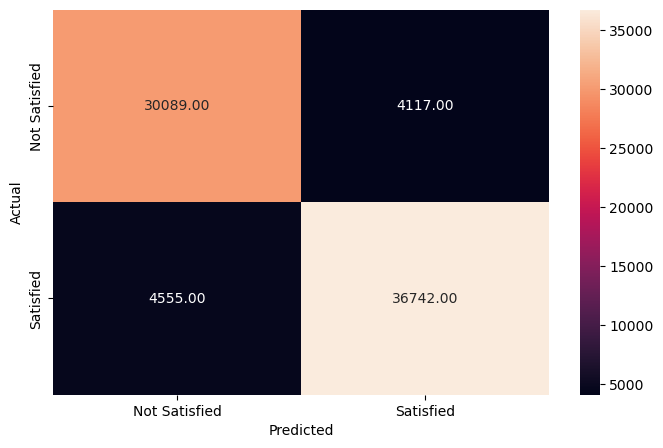

In [91]:
# Checking the performance on the training data
y_pred_train = logreg.predict(encoded_X_train)

metrics_score(y_train, y_pred_train)

In [92]:
# Verify the model - Print the coefficients and intercept
print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

Coefficients: [[-2.14710852e+00  0.00000000e+00  0.00000000e+00 -1.03923482e+00
   1.07583899e-01 -7.05927123e-01 -7.46392585e-01  4.53006798e+00
   1.00614082e+01  0.00000000e+00 -7.11532421e-01 -3.65286751e-01
  -2.55453630e-04  0.00000000e+00  0.00000000e+00 -5.52416124e-02
  -3.56052996e+00  2.79210193e-01  2.34255633e-01 -4.53309926e-01
  -8.09890789e-01  2.58162152e+00 -1.33506719e+00  1.16745288e+00
  -7.50190078e-01 -7.79171976e-01  0.00000000e+00  6.66522439e-01
   0.00000000e+00  3.69149354e-01 -4.41528198e-01 -6.64043408e-01
  -2.65654747e-03  9.22330864e-01 -1.87082157e+00  9.85604876e-01
   0.00000000e+00 -2.77445229e-01 -4.20461425e-01  2.77364174e-01
   3.16074586e-02  0.00000000e+00 -1.49994659e-01  4.11497409e-02
   4.97251734e-01  0.00000000e+00  0.00000000e+00 -1.57818428e-01
  -2.68838513e-01 -3.57879510e-01  3.66575933e-01 -8.29026092e-01
   7.52171287e-02  0.00000000e+00 -1.98636014e-01  0.00000000e+00
   3.60055966e-01 -6.72293189e+00  7.22901865e-02 -5.94012329e

In [93]:
# Get the feature names before one-hot encoding
original_feature_names = categorical_cols

# Create a dictionary to map coefficients to column names
coefficients_map = dict(zip(original_feature_names, logreg.coef_[0]))

# Print the coefficients and their corresponding column names
for feature, coefficient in coefficients_map.items():
    print(f"{feature}: {coefficient}")

Customer_Type: -2.1471085157610115
Type_Travel: 0.0
Travel_Class: 0.0
Seat_Comfort: -1.0392348201694706
Seat_Class: 0.10758389917044474
Onboard_Wifi_Service: -0.7059271228210219
Onboard_Entertainment: -0.7463925851677539
Onboard_Service: 4.5300679794667325
Legroom: 10.061408183031777
Baggage_Handling: 0.0
CheckIn_Service: -0.7115324214422327
Cleanliness: -0.3652867508365131
Online_Boarding: -0.00025545363019632123


In [94]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y_train_pred = logreg.predict(encoded_X_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


Training Accuracy: 0.8851436366766884


## Let's try some other models: GBM, Neural Networks, Random Forest, SVM

## Gradient Boost Model ##

In [95]:
# Fit Gradient Boosting Machine Model
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(encoded_X_train, y_train)
y_pred = gbm.predict(encoded_X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 90.21%


## Neural Network Model

In [96]:
# Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(encoded_X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(encoded_X_train, y_train, epochs=10, batch_size=32)

y_pred_probs = model.predict(encoded_X_test)
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/10
2360/2360 [==============================] - 1s 425us/step - loss: 0.2350 - accuracy: 0.8978
Epoch 2/10
2360/2360 [==============================] - 1s 418us/step - loss: 0.1843 - accuracy: 0.9197
Epoch 3/10
2360/2360 [==============================] - 1s 422us/step - loss: 0.1702 - accuracy: 0.9264
Epoch 4/10
2360/2360 [==============================] - 1s 417us/step - loss: 0.1623 - accuracy: 0.9293
Epoch 5/10
2360/2360 [==============================] - 1s 420us/step - loss: 0.1564 - accuracy: 0.9318
Epoch 6/10
2360/2360 [==============================] - 1s 423us/step - loss: 0.1521 - accuracy: 0.9345
Epoch 7/10
2360/2360 [==============================] - 1s 417us/step - loss: 0.1489 - accuracy: 0.9353
Epoch 8/10
2360/2360 [==============================] - 1s 414us/step - loss: 0.1459 - accuracy: 0.9373
Epoch 9/10
2360/2360 [==============================] - 1s 419us/step - loss: 0.1432 - accuracy: 0.9379
Epoch 10/10
590/590 [==============================] - 0s 226us/

## Random Forest Model

In [97]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=23)

# Fit the model to the training data
rf_model.fit(encoded_X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(encoded_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 92.93%


## Support Vector Machine

In [98]:
from sklearn.svm import SVC

# Create an instance of the Support Vector Machine Classifier
svm_model = SVC(kernel='rbf', random_state=23)

# Fit the model to the training data
svm_model.fit(encoded_X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(encoded_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 93.31%


## Optimized SVM - Computationally Expensive

In [99]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.feature_selection import SelectFromModel

# # 1. Hyperparameter Tuning
# # Define the parameter grid for grid search
# param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }

# # Create an SVM classifier
# svm = SVC()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svm, param_grid, cv=5)
# grid_search.fit(encoded_X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_

# # Train the SVM model with the best hyperparameters
# svm_best = SVC(**best_params)
# svm_best.fit(encoded_X_train, y_train)

# # 2. Feature Selection
# # Use feature importance for feature selection
# feature_importances = svm_best.coef_[0]
# selected_features = SelectFromModel(svm_best, prefit=True).get_support()
# X_train_selected = encoded_X_train.loc[:, selected_features]
# X_test_selected = encoded_X_test.loc[:, selected_features]

# # Train the SVM model with selected features
# svm_best_selected = SVC(**best_params)
# svm_best_selected.fit(X_train_selected, y_train)

# # Evaluate the model
# y_pred = svm_best_selected.predict(X_test_selected)
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

## Optimized Neural Networks

In [100]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
# Assuming you have df_train as your dataset

# Separate features and target variable
X = df_train.drop('Overall_Experience', axis=1)
y = df_train['Overall_Experience']

# Encode categorical columns
categorical_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class',
                    'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
                    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
                    'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_X = onehot_encoder.fit_transform(X[categorical_cols])

# Concatenate the encoded features with numerical features
numerical_cols = X.drop(categorical_cols, axis=1).columns
X_encoded = np.concatenate((encoded_X, X[numerical_cols].values), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=23)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/20
2360/2360 [==============================] - 1s 554us/step - loss: 0.2671 - accuracy: 0.8856 - val_loss: 0.1710 - val_accuracy: 0.9289
Epoch 2/20
2360/2360 [==============================] - 1s 525us/step - loss: 0.1850 - accuracy: 0.9239 - val_loss: 0.1492 - val_accuracy: 0.9365
Epoch 3/20
2360/2360 [==============================] - 1s 527us/step - loss: 0.1677 - accuracy: 0.9319 - val_loss: 0.1377 - val_accuracy: 0.9420
Epoch 4/20
2360/2360 [==============================] - 1s 531us/step - loss: 0.1571 - accuracy: 0.9362 - val_loss: 0.1316 - val_accuracy: 0.9416
Epoch 5/20
2360/2360 [==============================] - 1s 525us/step - loss: 0.1498 - accuracy: 0.9371 - val_loss: 0.1336 - val_accuracy: 0.9408
Epoch 6/20
2360/2360 [==============================] - 1s 536us/step - loss: 0.1482 - accuracy: 0.9386 - val_loss: 0.1272 - val_accuracy: 0.9429
Epoch 7/20
2360/2360 [==============================] - 1s 564us/step - loss: 0.1486 - accuracy: 0.9393 - val_loss: 0.1260 -

## CNN Model - Adam Optimizer with relu activation ##

In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load the dataset
# Assuming you have df_train as your dataset

# Separate features and target variable
X = df_train.drop('Overall_Experience', axis=1)
y = df_train['Overall_Experience']

# ... Rest of the code for preprocessing ...
# Encode categorical columns
categorical_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class',
                    'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
                    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
                    'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_X = onehot_encoder.fit_transform(X[categorical_cols])

# Concatenate the encoded features with numerical features
numerical_cols = X.drop(categorical_cols, axis=1).columns
X_encoded = np.concatenate((encoded_X, X[numerical_cols].values), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=23)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the input data to have a 2D structure (number of samples, number of features, 1)
X = X.values.reshape(X.shape[0], X.shape[1], 1)

# Create the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/20
2360/2360 [==============================] - 6s 2ms/step - loss: 0.1951 - accuracy: 0.9185 - val_loss: 0.1521 - val_accuracy: 0.9364
Epoch 2/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.1342 - accuracy: 0.9432 - val_loss: 0.1262 - val_accuracy: 0.9449
Epoch 3/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.1190 - accuracy: 0.9487 - val_loss: 0.1232 - val_accuracy: 0.9464
Epoch 4/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.1103 - accuracy: 0.9524 - val_loss: 0.1192 - val_accuracy: 0.9481
Epoch 5/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.1050 - accuracy: 0.9544 - val_loss: 0.1139 - val_accuracy: 0.9490
Epoch 6/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.0991 - accuracy: 0.9566 - val_loss: 0.1142 - val_accuracy: 0.9510
Epoch 7/20
2360/2360 [==============================] - 5s 2ms/step - loss: 0.0947 - accuracy: 0.9588 - val_loss: 0.1178 - val_accuracy:

## XG Boost Model ##

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import xgboost as xgb

# Load the dataset
# Assuming you have df_train as your dataset

# Separate features and target variable
X = df_train.drop('Overall_Experience', axis=1)
y = df_train['Overall_Experience']

# ... Code for preprocessing ...
# Encode categorical columns
categorical_cols = ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class',
                    'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service',
                    'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service',
                    'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_X = onehot_encoder.fit_transform(X[categorical_cols])

# Concatenate the encoded features with numerical features
numerical_cols = X.drop(categorical_cols, axis=1).columns
X_encoded = np.concatenate((encoded_X, X[numerical_cols].values), axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

# Compile and train the MLP model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Use the MLP model to generate predictions on the test set
mlp_preds = mlp_model.predict(X_test)

# Build the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, max_depth=3)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Use the XGBoost model to generate predictions on the test set
xgb_preds = xgb_model.predict_proba(X_test)[:, 1]

# Combine the predictions from both models using a weighted average
hybrid_preds = 0.5 * mlp_preds.flatten() + 0.5 * xgb_preds

# Convert the hybrid predictions to binary labels
hybrid_labels = np.where(hybrid_preds > 0.5, 1, 0)

# Evaluate the hybrid model
accuracy = np.mean(hybrid_labels == y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Epoch 1/10
2360/2360 [==============================] - 1s 478us/step - loss: 0.3156 - accuracy: 0.8629 - val_loss: 0.2341 - val_accuracy: 0.9035
Epoch 2/10
2360/2360 [==============================] - 1s 456us/step - loss: 0.2054 - accuracy: 0.9150 - val_loss: 0.1852 - val_accuracy: 0.9218
Epoch 3/10
2360/2360 [==============================] - 1s 450us/step - loss: 0.1784 - accuracy: 0.9249 - val_loss: 0.1728 - val_accuracy: 0.9254
Epoch 4/10
2360/2360 [==============================] - 1s 449us/step - loss: 0.1665 - accuracy: 0.9292 - val_loss: 0.1741 - val_accuracy: 0.9258
Epoch 5/10
2360/2360 [==============================] - 1s 459us/step - loss: 0.1589 - accuracy: 0.9323 - val_loss: 0.1632 - val_accuracy: 0.9314
Epoch 6/10
2360/2360 [==============================] - 1s 462us/step - loss: 0.1536 - accuracy: 0.9349 - val_loss: 0.1605 - val_accuracy: 0.9323
Epoch 7/10
2360/2360 [==============================] - 1s 456us/step - loss: 0.1497 - accuracy: 0.9361 - val_loss: 0.1604 -

## CNN Model with Early Stopping, relu activation, and Adam optimizer ##

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

# Separate features and target variable
X = df_test  # Features
y = df_train['Overall_Experience']  # Target variable from the training dataset

# ... Code for preprocessing ...
# Encode categorical columns
categorical_cols = ['Customer_Type','Type_Travel','Travel_Class','Seat_Comfort', 'Seat_Class', 
                    'Onboard_Wifi_Service','Onboard_Entertainment','Onboard_Service','Legroom',
                    'Baggage_Handling', 'CheckIn_Service', 'Cleanliness','Online_Boarding']

label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(sparse=False)
encoded_X = onehot_encoder.fit_transform(X[categorical_cols])

# Concatenate the encoded features with numerical features
numerical_cols = X.drop(categorical_cols, axis=1).columns
X_encoded = np.concatenate((encoded_X, X[numerical_cols].values), axis=1)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the CNN model
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/50
2360/2360 [==============================] - 5s 2ms/step - loss: 0.3373 - accuracy: 0.8546 - val_loss: 0.2109 - val_accuracy: 0.9105
Epoch 2/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.2437 - accuracy: 0.8975 - val_loss: 0.1856 - val_accuracy: 0.9201
Epoch 3/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.2238 - accuracy: 0.9053 - val_loss: 0.1726 - val_accuracy: 0.9238
Epoch 4/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.2113 - accuracy: 0.9094 - val_loss: 0.1658 - val_accuracy: 0.9280
Epoch 5/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.2029 - accuracy: 0.9132 - val_loss: 0.1617 - val_accuracy: 0.9300
Epoch 6/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.1957 - accuracy: 0.9177 - val_loss: 0.1567 - val_accuracy: 0.9330
Epoch 7/50
2360/2360 [==============================] - 4s 2ms/step - loss: 0.1929 - accuracy: 0.9184 - val_loss: 0.1563 - val_accuracy:

## Observations: ##
We have used several models including Logistic Regression, Gradient Boost, XGBoost, Support Vector Machines, Random Forest, and CNNs with best results from the CNN models at roughly ~94%.  Improvements most likely can be realized with hyperparameter tuning in the CNN models or an ensemble approach.